In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "results/test_file.csv"
df = pd.read_csv(file_path, index_col=False)
df = df.loc[df.track_id==2]
df.head()

,track_id,input1_latitude,input1_longitude,input2_latitude,input2_longitude,input3_latitude,input3_longitude,input4_latitude,input4_longitude,target_latitude,target_longitude,prediction_latitude,prediction_longitude
7,2,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.5,-0.1,2.0,"[-0.003175199031829834, 0.031439654529094696, ...","[1.910503625869751, 1.9747651815414429, 2.0788..."
8,2,0.0,0.5,0.0,1.0,0.0,1.5,-0.1,2.0,-0.3,2.2,"[-0.19394487142562866, -0.007031567394733429, ...","[2.4928219318389893, 2.559429407119751, 2.6266..."
9,2,0.0,1.0,0.0,1.5,-0.1,2.0,-0.3,2.2,-0.7,2.1,"[-0.4824463725090027, -0.19456303119659424, -0...","[2.390922784805298, 2.615448236465454, 2.65980..."
10,2,0.0,1.5,-0.1,2.0,-0.3,2.2,-0.7,2.1,-1.1,1.8,"[-0.9909624457359314, -0.9272375106811523, -0....","[2.2606468200683594, 2.214492082595825, 2.3384..."
11,2,-0.1,2.0,-0.3,2.2,-0.7,2.1,-1.1,1.8,-1.5,1.5,"[-1.4251606464385986, -1.3278656005859375, -1....","[1.6188409328460693, 1.795960783958435, 1.7878..."


In [3]:
index = np.random.randint(0, 19)

# Data
data_lat = np.array(df.prediction_latitude.apply(lambda x: np.array(eval(x))).tolist())[index]
data_long = np.array(df.prediction_longitude.apply(lambda x: np.array(eval(x))).tolist())[index]
data = np.vstack((data_lat, data_long))
data.min(axis=1), data.max(axis=1)

(array([-1.50533533,  3.33211684]), array([-0.59198982,  4.64117098]))

In [4]:
_mean, _cov = np.mean(data, axis=1), np.cov(data)
_mean, _cov

(array([-1.11177122,  4.0500145 ]),
 array([[0.02860319, 0.0228757 ],
        [0.0228757 , 0.06994836]]))

In [5]:
from scipy.stats import multivariate_normal

In [6]:
dist = multivariate_normal(mean=_mean, cov=_cov)

In [7]:
x = np.linspace(_mean[0]-1, _mean[0]+1, 100)
y = np.linspace(_mean[1]-1, _mean[1]+1, 100)

xx, yy = np.meshgrid(x, y)


In [8]:
pdf = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        pdf[i, j] = dist.pdf([xx[i, j], yy[i, j]])

        

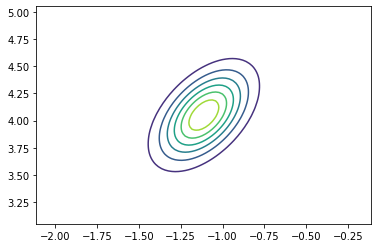

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, pdf)